In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.manifold import Isomap, TSNE, MDS

## 원

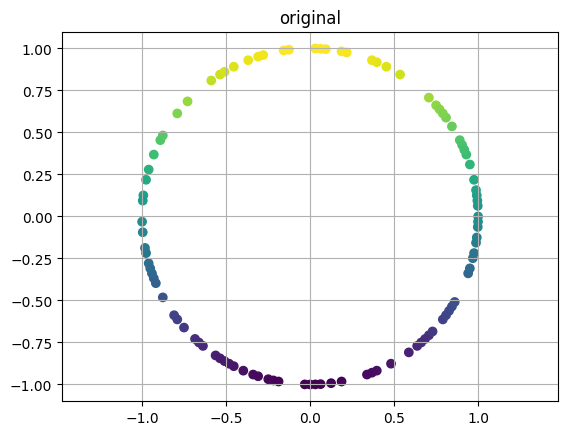

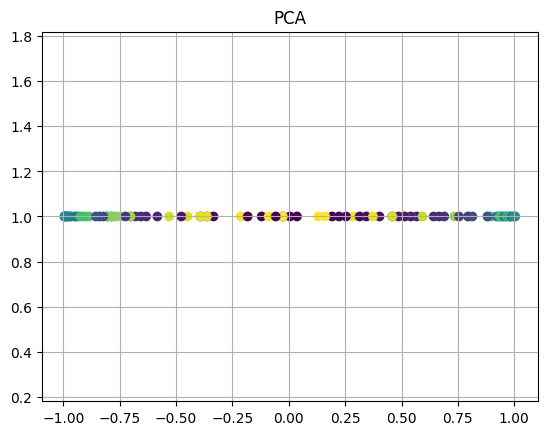

In [4]:
R = 1 # 반지름
n = 200 # 데이터 갯수
t = np.linspace(0, 2*np.pi, n+1) # 원 그리기..
x = R * np.cos(t)
y = R * np.sin(t)
idx = [i for i in range(len(x))]
a = np.random.choice(idx, int(len(x) * 0.5), replace=False)
z = [i for i in range(len(a))]
plt.axis('equal')
plt.grid()
plt.title('original')
plt.scatter(x[a], y[a], c=y[a])
plt.show()
#
z = []
for i, j in zip(x,y):
    k = [i, j]
    z.append(k)
z = np.array(z)
# PCA
pca = PCA(n_components = 1)
pca_done = pca.fit_transform(z)
plt.axis('equal')
plt.grid()
plt.title('PCA')
plt.scatter(np.array(pca_done[a]), [1 for i in range(len(a))], c=y[a])
plt.show()

## 구

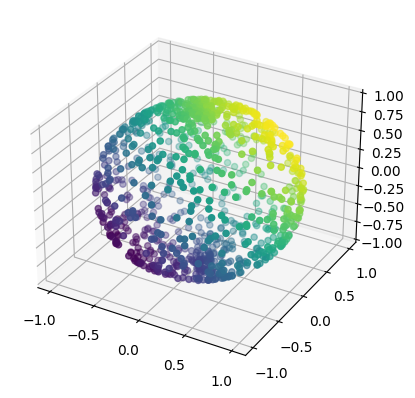

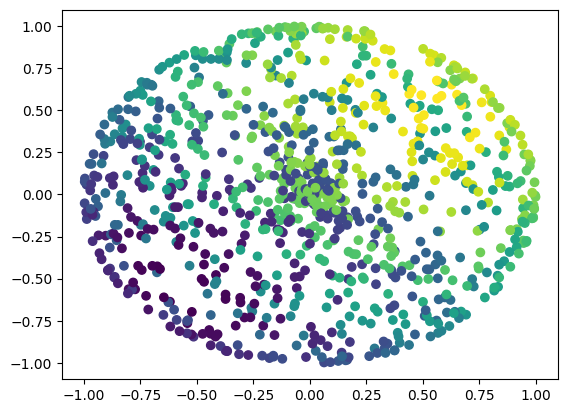

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = 1

ang1 = np.random.normal(0, 2*np.pi, n)
ang2 = np.random.normal(0, np.pi, n)

x = r*np.cos(ang1)*np.cos(ang2)
y = r*np.sin(ang1)*np.cos(ang2)
z = r*np.sin(ang2)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, 
           c=(x+y+z))


ax.set_zlim([-1,1])

X = np.array([(a,b,c) for a,b,c in zip(x,y,z)])

pca = PCA(n_components=2)
sph_pca = pca.fit_transform(X)
sph_pca

fig = plt.figure()
ax = plt.axes()

ax.scatter(X[:,0], X[:,1], c=(x+y+z))
plt.show()

## 원기둥

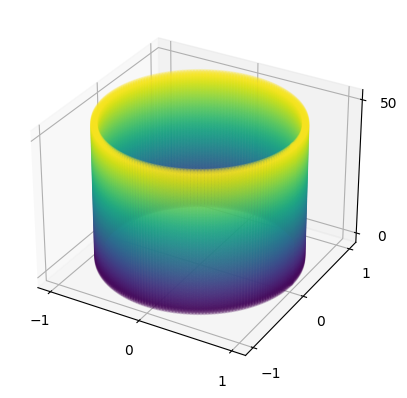

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


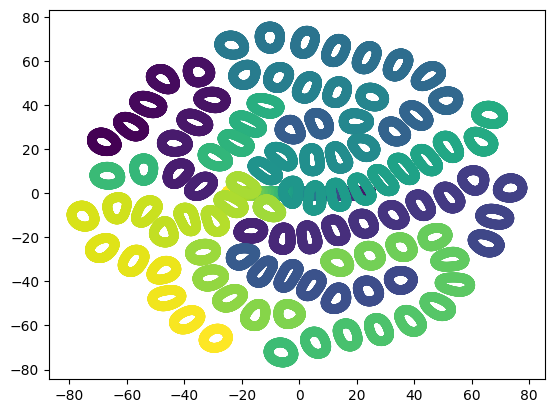

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(0, 2 * np.pi, 201)
radius = 1
x = np.linspace(0, 50, 100)
# print(x)
thetas, xs = np.meshgrid(theta, x)
# print(xs)
c = xs
y = radius * np.cos(thetas)
z = radius * np.sin(thetas)
ax.scatter(y, z, xs, c=c, alpha=0.2)
ax.set_xticks([-radius, 0, radius])
ax.set_yticks([-radius, 0, radius])
ax.set_zticks([0, 50])
plt.show()
xs_r = xs.reshape(-1,1)
y_r = y.reshape(-1,1)
z_r = z.reshape(-1,1)
c_r = c.reshape(-1,1)
concat = np.concatenate((y_r,z_r,xs_r),axis=1)
pca = PCA(n_components=2)
concat_pca = pca.fit_transform(concat)
# 1d array
t = np.array([0]*20100)
t = t.reshape(-1,1)
plt.scatter(concat_pca[:,0], concat_pca[:,1], c=xs_r, alpha = 0.2);
### t-SNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(concat)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=c_r)
plt.show() 

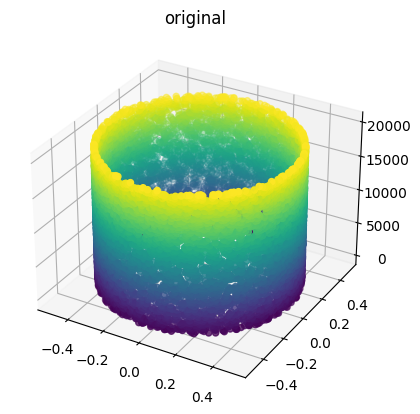

In [4]:
H = 20000
R = 100
size = 10000
r = 0.5
s = np.random.uniform(0, 1, size=size)
theta = np.random.uniform(0, 2*np.pi, size=size)
z = np.random.uniform(0, H, size=size)
x = r * np.cos(theta)
y = r * np.sin(theta)
z = z # .. for symmetry :-)
c=z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z)
plt.title('original')
plt.show()
# change shape
x_r = x.reshape(-1,1)
y_r = y.reshape(-1,1)
z_r = z.reshape(-1,1)
c_r = c.reshape(-1,1)
concat = np.concatenate((y_r,z_r,x_r),axis=1)
# # PCA
# pca = PCA(n_components=2)
# concat_pca = pca.fit_transform(concat)
# fig = plt.figure()
# plt.title('PCA')
# plt.scatter(concat_pca[:,0], concat_pca[:,1],c=z);
# # Isomap
# isomap = Isomap(n_components=2)
# concat_isomap = isomap.fit_transform(concat)
# fig = plt.figure()
# plt.title('isomap')
# plt.scatter(concat_isomap[:,0], concat_isomap[:,1],c=z)
# # MDS
# mds = MDS(n_components=2)
# concat_mds = mds.fit_transform(concat)
# fig = plt.figure()
# plt.title('MDS')
# plt.scatter(concat_mds[:,0], concat_mds[:,1],c=z)
# # LDA(LatentDirichletAllocation)
# lda = LatentDirichletAllocation(n_components=2)
# concat_lda = lda.fit_transform(concat)
# fig = plt.figure()
# plt.title('LDA')
# plt.scatter(concat_mds[:,0], concat_mds[:,1],c=z)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 85 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/conda/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/conda/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/conda/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/conda/lib/python3.8/site-packages/sci

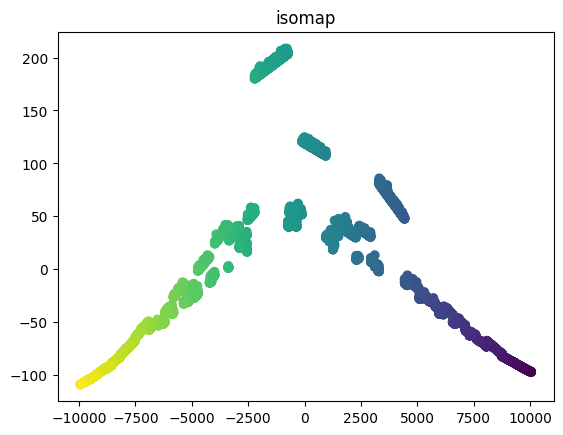

In [6]:
# Isomap
isomap = Isomap(n_components=2, n_neighbors=5)
concat_isomap = isomap.fit_transform(concat)
fig = plt.figure()
plt.title('isomap')
plt.scatter(concat_isomap[:,0], concat_isomap[:,1],c=z)

## 토러스

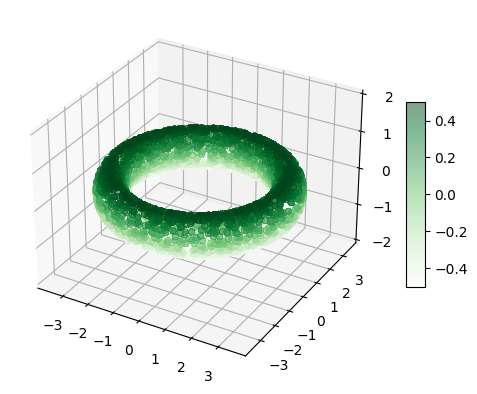

In [15]:
fig = plt.figure(figsize=(plt.figaspect(0.7)))
ax = fig.add_subplot(111, projection='3d')
n = 64
U = (np.random.random(n ** 2) * 2*np.pi).reshape(n,n)
V = (np.random.random(n ** 2) * 2*np.pi).reshape(n,n)
# U = np.linspace(0, 2*np.pi, n)
# V = np.linspace(0, 2*np.pi, n)
# U,V = np.meshgrid(U,V)
a = 3
b = 0.5
X = (a + b * np.cos(V)) * np.cos(U)
Y = (a + b * np.cos(V)) * np.sin(U)
Z = b * np.sin(V)
W = Z.reshape(-1)
surf = ax.scatter(X,Y,Z, c=W, cmap='Greens',
        linewidth=0.01, antialiased=False, alpha = 0.5)
ax.set_zlim3d(-2.01, 2.01)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


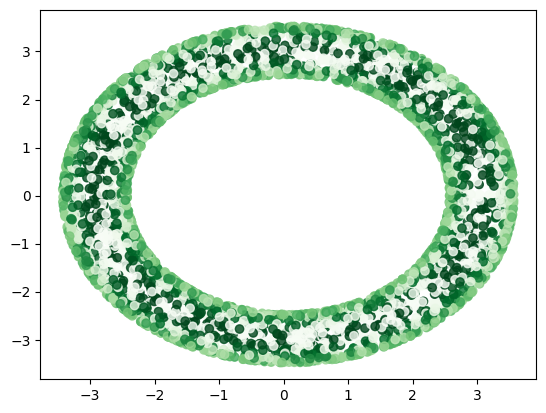

In [16]:
lst = []
for x,y,z,w in zip(X.reshape(-1),Y.reshape(-1),Z.reshape(-1), W.reshape(-1)):
    lst.append((x,y,z,w))
lst = np.array(lst)
X = lst[:, :-1]
y = lst[:, -1]
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y, cmap='Greens', alpha=0.8);

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


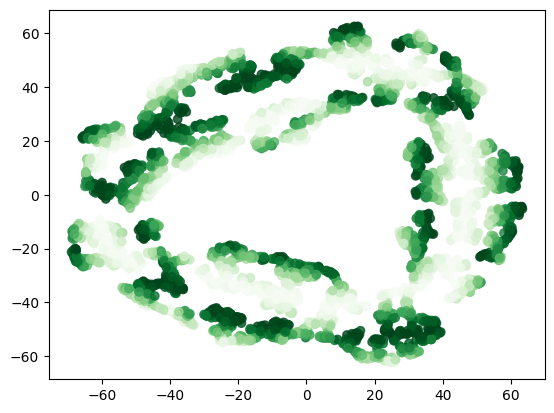

In [17]:
tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(X)
tsne_X
plt.scatter(tsne_X[:, 0], tsne_X[:, 1], c=y, cmap='Greens', alpha=0.8);
plt.show()

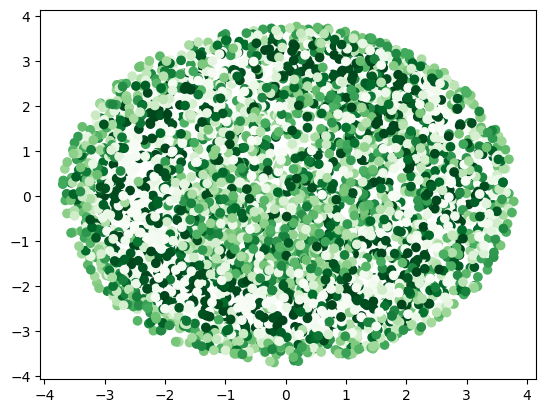

In [20]:
mds = MDS(n_components=2, verbose=1, max_iter=10)
mds_X = mds.fit_transform(X)
mds_X
plt.scatter(mds_X[:, 0], mds_X[:, 1], c=y, cmap='Greens')

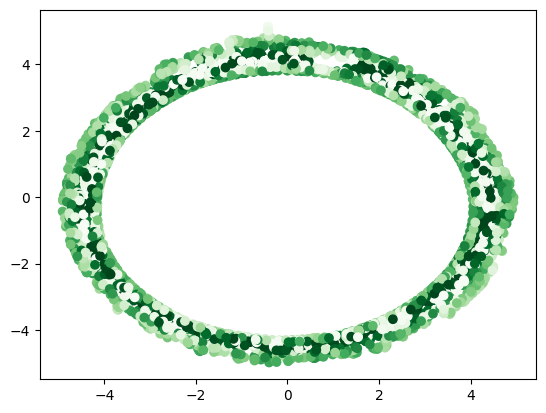

In [21]:
iso = Isomap(n_components=2)
iso_X = iso.fit_transform(X)
iso_X
plt.scatter(iso_X[:, 0], iso_X[:, 1], c=y, cmap='Greens')